<h1> Assignment 10.2 - ARIMA Model </h1>
Name: Nicolas, Sean Julian S.<br>
Course and Section: CPE019S3 <br>
Instructor: Engr. Roman Richard <br>
Date Performed: April 27, 2024 <br>
Date Submitted: April 30, 2024 <br>

<hr>

## Load Time Series Data

In [ ]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = pd.read_csv('/content/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

<ipython-input-11-e0b0b3bee7eb>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('/content/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


## Visualize the Time Series

            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


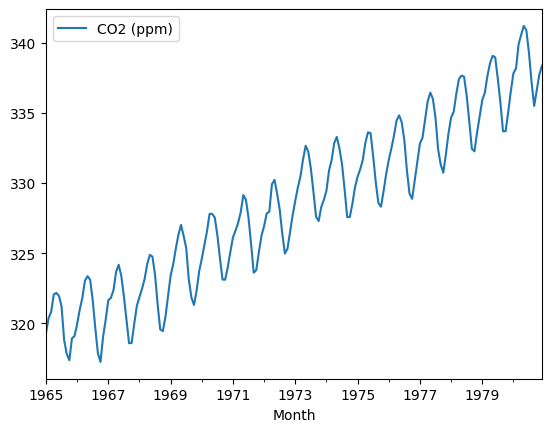

In [ ]:
print(series.head())
series.plot()
plt.show()

- looking at the plot, there is an upward trend of CO2 as the year progresses.

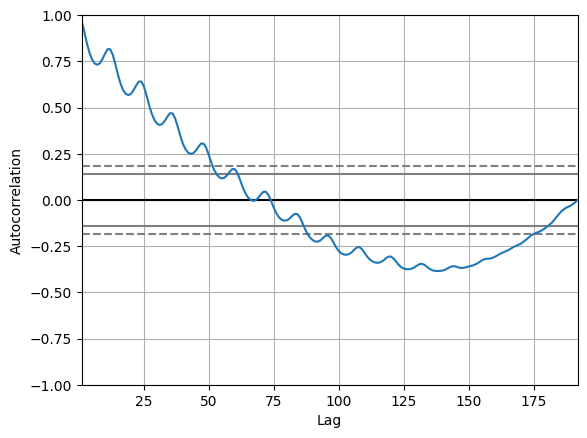

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

## Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Tue, 30 Apr 2024   AIC                            457.638
Time:                        08:21:44   BIC                            467.395
Sample:                    01-31-1965   HQIC                           461.590
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

## Improve the ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model = ARIMA(series, order=(9,2,0))
model_fit = model.fit()

## Print the model summary

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(9, 2, 0)   Log Likelihood                -168.899
Date:                Tue, 30 Apr 2024   AIC                            357.797
Time:                        10:19:37   BIC                            390.267
Sample:                    01-31-1965   HQIC                           370.950
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2510      0.068     -3.684      0.000      -0.385      -0.117
ar.L2         -0.0947      0.057     -1.665      0.096      -0.206       0.017
ar.L3         -0.3761      0.055     -6.826      0.0

- order was adjusted based on the best order based on the grid search

## Make a forecast (steps=10)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01    338.829450
1981-02    339.410077
1981-03    339.846441
1981-04    339.951027
1981-05    339.624439
1981-06    338.996781
1981-07    338.387871
1981-08    338.097810
1981-09    338.219246
1981-10    338.635268
1981-11    339.168786
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


## Plot the forecast

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

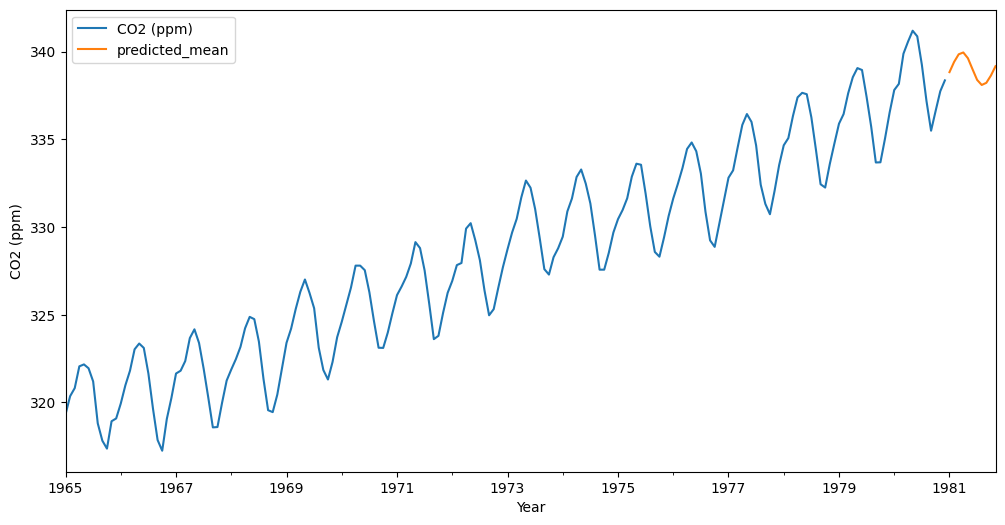

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

## Perform a grid search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

- Based on the grid search best order is (9,2,0) having MSE = 1.15

## Supplementary Activity

### Load Dataset

In [ ]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series2 = pd.read_csv('/content/dataset_temperature.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser, skipfooter=2)

- used skipfooter to remove last two rows since one of them is an empty cell, second is a text

### Visualize the Time Series

            Mean monthly temperature
Month                               
1907-01-01                      33.3
1907-02-01                      46.0
1907-03-01                      43.0
1907-04-01                      55.0
1907-05-01                      51.8


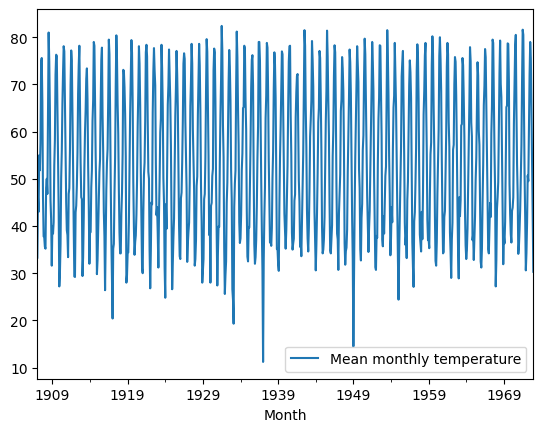

In [ ]:
print(series2.head())
series2.plot()
plt.show()

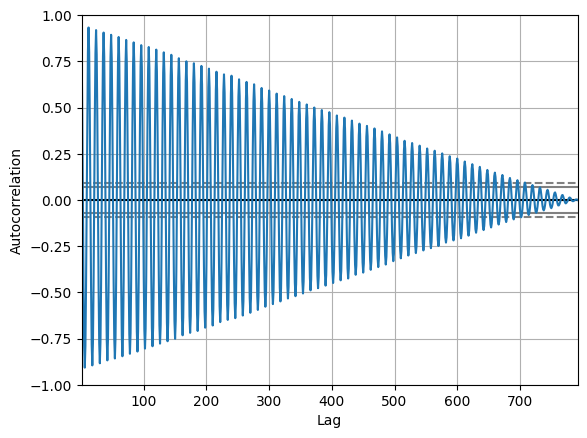

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series2)
pyplot.show()

### Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model2 = ARIMA(series2, order=(1,1,1))
model_fit2 = model2.fit()

In [ ]:
print(model_fit2.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Tue, 30 Apr 2024   AIC                           5553.192
Time:                              09:57:11   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

### Improve ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model2 = ARIMA(series2, order=(3,0,3))
model_fit2 = model2.fit()

### Print the model summary

In [ ]:
print(model_fit2.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(3, 0, 3)   Log Likelihood               -2283.903
Date:                      Tue, 30 Apr 2024   AIC                           4583.806
Time:                              10:09:59   BIC                           4621.202
Sample:                          01-01-1907   HQIC                          4598.179
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5658      0.163    329.611      0.000      53.247      53.884
ar.L1          0.7376      0.017     42.883      0.000       0.704       0.771
ar.L

- used order 3,0,3 based on the grid search

### Make a forecast (steps=10)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(series2) * 0.75)
train_data, test_data = series2[0:train_size], series2[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (3,0,3))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series2), len(series2)+10, typ = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1973-01-01    32.790219
1973-02-01    34.944437
1973-03-01    42.067584
1973-04-01    52.259953
1973-05-01    62.779879
1973-06-01    70.817512
1973-07-01    74.209661
1973-08-01    72.056988
1973-09-01    64.928021
1973-10-01    54.742817
1973-11-01    44.222666
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  15.662469948959755
RMSE:  3.9575838524230607


### Plot the forecast

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

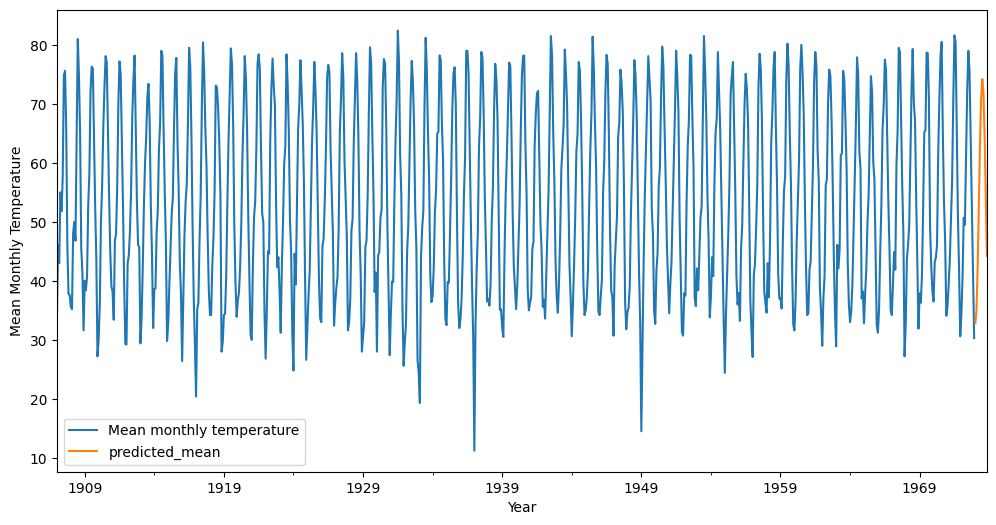

In [ ]:
ylabel='Mean Monthly Temperature'
xlabel='Year'

ax = series2.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

- prediction mean based on the dataset learned by the model

### Perform a grid search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series2) * 0.75)
  train_data, test_data = series2[0:train_size], series2[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model2 = ARIMA(train_data, order = arima_order)
  results = model2.fit()
  forecast = results.predict(len(series2), len(series2)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series2, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series2.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.293
ARIMA(1, 2, 2) MSE=1669.403
ARIMA(1, 2, 3) MSE=1745.212
ARIMA(1, 3, 0) MSE=348687748.241
ARIMA(1, 3, 1) MSE=1318901.869
ARIMA(1, 3, 2) MSE=1359081.389
ARIMA(1, 3, 3) MSE=1237604.102
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.30

- grid search shows the order 3,0,3 has the lowest MSE, which is equals to 15.662

## Conclusion
- In this laboratory activity, I was able to perform and create and ARIMA model that is commonly used for time series analysis and forecasting. The challenge was finding the base order for the model in order to find the best prediction. I find it amazing how performing a grid search, we are able to know the best order for the ARIMA model by checking each of the orders' mean squared errors. It can also be seen in the plot that the model is able to accurately predict the pattern or the mean value prediction beased on the given data in the dataset.